# Icy River Model Demonsration

In [1]:
from landlab import imshow_grid, RasterModelGrid
from src import icyrivermodel
import matplotlib.pyplot as plt
import numpy as np

## Picture

## Define Physical Processes and Boundaries

$k_{perma}$  = thermal conductivity of permafrost = 1 $\frac{W}{m K^{\circ}}$
dependent 

$T_w$ = temperature of river water $K^{\circ}$

$T_a$ = temperature of air $K^{\circ}$

$T_p$ = temperature of permafrost $K^{\circ}$

## subaerial erosion

# $\dfrac{\delta X}{\delta t} = -\alpha [T_{air} - T_{melt}]$

## subaqueous erosion

fluvial entrainment of thawed bank material, limited by thaw rate

$q_{conduction} = -k_{perma} \Delta T = - k_{perma} (T_{water} - T_{melt})$


## slope failure
under construction


In [2]:
params = {
    "run_duration": 365*10*24*60*60,  # s
    "dt": 600,  # seconds
    "lower_bound__temperature": 273.15-10,  # degrees C
    "lower_bound__depth": -5,  # m below river bed
    "air_temperature__mean": 275,  # degrees C
    "air_temperature__amplitude": 10,  # degrees C
    "air_temperature__period": 365,  # days
    "water_temperature__max": 278.15,  # degrees C
    "bank_width":8,  # m
    "bank_height": 2,  # m
    "dx": 0.1,  # m
    "initial_river_stage": 1,  # m
    "river_half_width":1,  # m
    "riverbed_temp": 273.15,  # degrees K
    "profile_dz": .05,# m
    "subaerial_erosion": 0.001,#m
    "morph_factor": 1,#[*],
    "save_dt": 60*24*60*100,
    "water_content": 50,
    "trib_doy":130,
    "tfreeze_doy": 280,
}

## Assumptions

$dz, dy, L_{ice}, \rho_{ice}, W, c_p, \rho_{perma}, T_{melt} \neq f(t)$

all material eroded from thre riverbank is immediately transported downstream


## Erosion Rate Derivation


 $$\dfrac{\delta X }{\delta t}=\dfrac{\dfrac{-k([T_{water} - T]}{c\rho_{perma}[T_{melt}- T]}   - k_d (\tau - \tau_c) }{ 1 + \dfrac{L \rho_{ice} W}{c\rho_{perma}[T_{melt}- T]}}$$


$$\tau = \dfrac{\rho_w (k U*)^2}{ (\ln{\frac{10 z}{D84}})^{2}}$$

## Boundary Conditions
#### permafrost boundaries
$T_p(x, z = - 5 m)$ = -5 $C^{\circ}$

$T_p(x = 0, z<=$bank_height$)$ = -5 $C^{\circ}$

$T_p(x =$ bank_width+river_half_width$, z<=$riverbed_z$) = $-5 $C^{\circ}$

#### subaerial boundaries
$T_a(t) = MAT + \frac{Amp}{2} -\cos(\frac{2 \pi t}{365})$

#### subaqueous boundaries
$$DOY = t/(60*60*24) \mod 365$$

$$T_w(DOY) =   \left\{
\begin{array}{ll}
      T_{melt} & DOY < t_{rib} \\
      T_{melt}+ (T_{wmax} - T_{melt})\frac{ t_{highflow}-DOY }{t_{highflow} - t_{rib}} & t_{rib}<=  DOY < t_{highflow}  \\
       T_{melt}+ (T_{wmax} - T_{melt})\frac{t_{freeze}- DOY}{t_{freeze} - t_{highflow}} & t_{highflow}<=  DOY <= t_{freeze} \\
      T_{melt} & DOY > t_{freeze} \\
\end{array} 
\right.  $$

#### riverbed boundaries
$$T_{rb}(DOY) =   \left\{
\begin{array}{ll}
      T_w(DOY) & DOY < t_{rib} \\
      T_{melt} & t_{rib}<=DOY<=t_{freeze}\\
      T_w(DOY) & DOY > t_{freeze} \\
\end{array} 
\right.  $$

## River Stage

## Initial Conditions

$T_p(x, z)$ = -5 $C^{\circ}$


In [3]:
icyriver = icyrivermodel.IcyRiver(params)
icyriver.plot_riverbank_temp()#show = True)

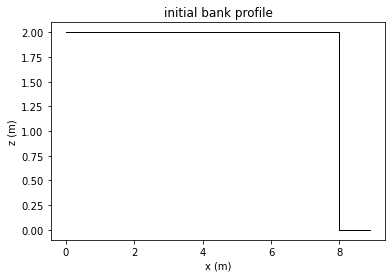

In [4]:
plt.plot(icyriver.profiles[-1].x, icyriver.profiles[-1].z, c = 'k',linewidth = 1, alpha = 1)
plt.title("initial bank profile")
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.show()

## Demonstration

In [5]:
icyriver.run()

130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15

133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.63

135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.95

138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.440

140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.924

143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.24

146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.73

148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.053

151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.53

153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.0209

156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.343

158
277.666129032258
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.827

130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15

133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.63

135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.11

138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.440

140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.924

143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.24

146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.73

148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.053

151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.53

153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277

156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.343

159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.82

130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15

133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.63

135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.11

138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.440

140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.924

143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.24

146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.73

148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.053

151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.53

153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.020967

156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.343

159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.82

130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15

133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.63

135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.1177419354838
136
274.11

138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.440

140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.924

143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.24

146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.73

148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.053

151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.53

153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.0209677419

156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.343

158
277.666129032258
158
277.666129032258
158
277.666129032258
158
277.666129032258
158
277.666129032258
158
277.666129032258
158
277.666129032258
158
277.666129032258
158
277.666129032258
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.82741935483

130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15

133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.63

135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.95

138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.440

140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.924

143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.24

275.56935483870967
145
275.56935483870967
145
275.56935483870967
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.730

148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.053

151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.53

153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546

156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.343

158
277.666129032258
158
277.666129032258
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274

130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15
130
273.15

133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.6338709677419
133
273.63

135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
135
273.9564516129032
136
274.1177419354838
136
274.11

138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.44032258064516
138
274.440

140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
140
274.76290322580644
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.92419354838705
141
274.924

143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.2467741935484
143
275.24

146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.7306451612903
146
275.73

148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.05322580645156
148
276.053

151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.5370967741935
151
276.53

153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
153
276.8596774193548
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546
154
277.02096774193546

156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.34354838709675
156
277.343

158
277.666129032258
158
277.666129032258
158
277.666129032258
158
277.666129032258
158
277.666129032258
158
277.666129032258
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.8274193548387
159
277.82741935

KeyboardInterrupt: 

In [ ]:
icyriver.time/(60*60*24)

In [ ]:
#icyrivermodel.make_animation('temp_movie/', 'riverbanktemp')
#print(len(icyriver.banklines[-1].x))

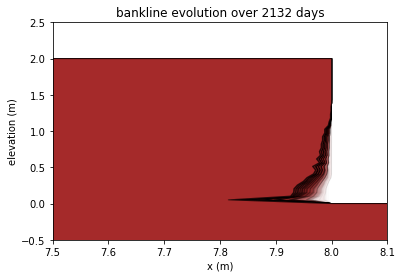

In [6]:
#[plt.plot(bl.x, bl.z, c = 'k',linewidth = .5, alpha = .25) for bl in icyriver.banklines[::61]]
[plt.fill_between(x=bl.x,y1=bl.z,y2=np.ones_like(bl.z) * -2,color="brown",edgecolor = 'k', alpha =.5*(bl.age/icyriver.time))for bl in icyriver.profiles[::int(31*24*60*60/icyriver.dt)]]
#scs = [plt.scatter(bl.x,bl.z, c = bl.T, cmap = 'hot') for bl in [icyriver.banklines[-1]]]
#plt.colorbar(scs[-1], label = "surface temperature \n [$\degree$ C]")http://localhost:8888/notebooks/Icyrivermodel_demo.ipynb#
plt.title("bankline evolution over "+ str(int((icyriver.time /(60 * 60 * 24))) )+" days")   
plt.xlabel("x (m)")
#plt.gca().axis('equal')
plt.xlim((7.5, 8.1))
plt.ylim((-.5, 2.5))
plt.ylabel("elevation (m)")
plt.savefig("10yearsbankevolution.png", dpi = 500)

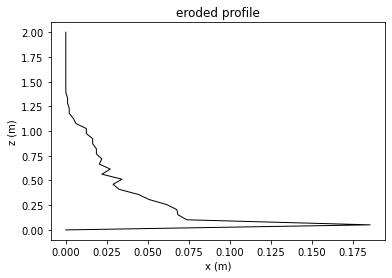

In [7]:
plt.plot(icyriver.profiles[0].x -icyriver.profiles[-1].x , icyriver.profiles[0].z, c = 'k',linewidth = 1, alpha = 1)
#plt.plot(icyriver.banklines[-1].x, icyriver.banklines[-1].z, c = 'k',linewidth = 1, alpha = 1)
plt.title("eroded profile")
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.show()

In [8]:

print("volume eroded = " + str(np.sum(icyriver.profiles[0].x - icyriver.profiles[-1].x) *params['profile_dz'])+ " m^3")

volume eroded = 0.0426007236211 m^3
